### Import Libraries

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Classifier

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

### Dataset directory

In [3]:
data_dir = "multi-plant-disease-dataset"

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('multi-plant-disease-dataset')

Checkout dataset and directories

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('multi-plant-disease-dataset/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG'),
 WindowsPath('multi-plant-disease-dataset/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG'),
 WindowsPath('multi-plant-disease-dataset/Pepper__bell___Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG'),
 WindowsPath('multi-plant-disease-dataset/Pepper__bell___Bacterial_spot/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG'),
 WindowsPath('multi-plant-disease-dataset/Pepper__bell___Bacterial_spot/0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

20635


In [6]:
Potato___Early_blight = list(data_dir.glob('Potato___Early_blight/*'))
Potato___Early_blight[:5]

[WindowsPath('multi-plant-disease-dataset/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'),
 WindowsPath('multi-plant-disease-dataset/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG'),
 WindowsPath('multi-plant-disease-dataset/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG'),
 WindowsPath('multi-plant-disease-dataset/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG'),
 WindowsPath('multi-plant-disease-dataset/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG')]

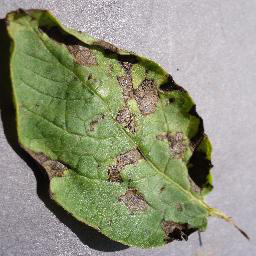

In [7]:
Image.open(str(Potato___Early_blight[1]))

### Dictionaries

In [8]:
diseases_images_dict = {
    'Pepper__bell___Bacterial_spot': list(data_dir.glob('Pepper__bell___Bacterial_spot/*')),
    'Pepper__bell___healthy': list(data_dir.glob('Pepper__bell___healthy/*')),
    'Potato___Early_blight': list(data_dir.glob('Potato___Early_blight/*')),
    'Potato___Late_blight': list(data_dir.glob('Potato___Late_blight/*')),
    'Potato___healthy': list(data_dir.glob('Potato___healthy/*')),
    'Tomato_Bacterial_spot': list(data_dir.glob('Tomato_Bacterial_spot/*')),
    'Tomato_Early_blight': list(data_dir.glob('Tomato_Early_blight/*')),
    'Tomato_Late_blight': list(data_dir.glob('Tomato_Late_blight/*')),
    'Tomato_Leaf_Mold': list(data_dir.glob('Tomato_Leaf_Mold/*')),
    'Tomato_Septoria_leaf_spot': list(data_dir.glob('Tomato_Septoria_leaf_spot/*')),
    'Tomato_Spider_mites_Two_spotted_spider_mite': list(data_dir.glob('Tomato_Spider_mites_Two_spotted_spider_mite/*')),
    'Tomato__Target_Spot': list(data_dir.glob('Tomato__Target_Spot/*')),
    'Tomato__Tomato_YellowLeaf__Curl_Virus': list(data_dir.glob('Tomato__Tomato_YellowLeaf__Curl_Virus/*')),
    'Tomato__Tomato_mosaic_virus': list(data_dir.glob('Tomato__Tomato_mosaic_virus/*')),
    'Tomato_healthy': list(data_dir.glob('Tomato_healthy/*')),
}

In [9]:
diseases_labels_dict = {
    'Pepper__bell___Bacterial_spot': 0,
    'Pepper__bell___healthy': 1,
    'Potato___Early_blight': 2,
    'Potato___Late_blight': 3,
    'Potato___healthy': 4,
    'Tomato_Bacterial_spot': 5,
    'Tomato_Early_blight': 6,
    'Tomato_Late_blight': 7,
    'Tomato_Leaf_Mold': 8,
    'Tomato_Septoria_leaf_spot': 9,
    'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
    'Tomato__Target_Spot': 11,
    'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
    'Tomato__Tomato_mosaic_virus': 13,
    'Tomato_healthy': 14,
}

In [79]:
classes = list(diseases_labels_dict)
classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

Checkout dictionaries and output directories

In [10]:
diseases_images_dict['Tomato_healthy'][:5]

[WindowsPath('multi-plant-disease-dataset/Tomato_healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG'),
 WindowsPath('multi-plant-disease-dataset/Tomato_healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG'),
 WindowsPath('multi-plant-disease-dataset/Tomato_healthy/0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG'),
 WindowsPath('multi-plant-disease-dataset/Tomato_healthy/003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG'),
 WindowsPath('multi-plant-disease-dataset/Tomato_healthy/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG')]

In [11]:
str(diseases_images_dict['Tomato_Early_blight'][0])

'multi-plant-disease-dataset\\Tomato_Early_blight\\0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG'

### Resizing

Checkout resize

In [12]:
img = cv2.imread(str(diseases_images_dict['Tomato_Early_blight'][0]))
img.shape

(256, 256, 3)

In [13]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

Resizing all images

In [14]:
X, y = [], []

try: 
    for disease_name, images in diseases_images_dict.items():
        for image in images:
            #print(str(image))
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img,(224,224))
            X.append(resized_img)
            y.append(diseases_labels_dict[disease_name])
except Exception as e:
    print(str(e))

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



Converting image array to numpy array

In [15]:
X = np.array(X)
y = np.array(y)

### Train test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train.shape

(14004, 224, 224, 3)

In [18]:
X_test.shape

(4669, 224, 224, 3)

### Preprocessing: scale images

In [19]:
X_train_scaled = X_train / np.float32(255)

In [20]:
X_test_scaled = X_test / np.float32(255)

In [ ]:
#X_train_scaled[:5]

### Taking pre-trained model and retraining

In [21]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [22]:
num_of_diseases = 15

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_diseases)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 2,277,199
Trainable params: 19,215
Non-trainable params: 2,257,984
_________________________________________________________________


In [23]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
438/438 [==============================] - 304s 676ms/step - loss: 0.6990 - accuracy: 0.7894
Epoch 2/10
438/438 [==============================] - 303s 693ms/step - loss: 0.3406 - accuracy: 0.8949
Epoch 3/10
438/438 [==============================] - 331s 755ms/step - loss: 0.2649 - accuracy: 0.9171
Epoch 4/10
438/438 [==============================] - 327s 746ms/step - loss: 0.2224 - accuracy: 0.9337
Epoch 5/10
438/438 [==============================] - 321s 732ms/step - loss: 0.1918 - accuracy: 0.9413
Epoch 6/10
438/438 [==============================] - 316s 722ms/step - loss: 0.1675 - accuracy: 0.9494
Epoch 7/10
438/438 [==============================] - 314s 716ms/step - loss: 0.1514 - accuracy: 0.9557
Epoch 8/10
438/438 [==============================] - 321s 734ms/step - loss: 0.1360 - accuracy: 0.9614
Epoch 9/10
438/438 [==============================] - 336s 768ms/step - loss: 0.1260 - accuracy: 0.9639
Epoch 10/10
438/438 [==============================] - 334s 763m

### Model Testing

In [29]:
score = model.evaluate(X_test_scaled, y_test)

146/146 [==============================] - 101s 666ms/step - loss: 0.2428 - accuracy: 0.9188


In [30]:
score

[0.2427828162908554, 0.9188262820243835]

In [31]:
acc = history.history['accuracy']
loss = history.history['loss']

Text(0.5, 1.0, 'Training Accuracy and Loss')

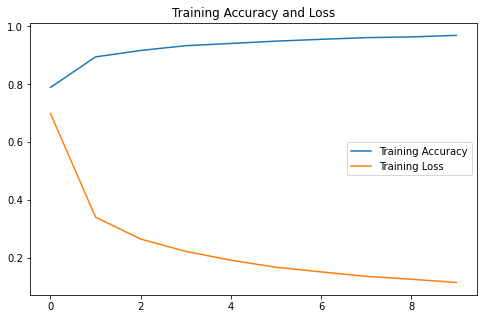

In [47]:
EPOCHS = 10

plt.figure(figsize=(8, 5))
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

## Prediction

### Confusion Maxtrix

In [48]:
y_predicted = model.predict(X_test_scaled)

146/146 [==============================] - 95s 638ms/step


In [58]:
y_predicted[:3]

array([[ -8.769108  , -11.508155  , -10.697864  , -10.425527  ,
         -8.67971   ,  -4.498773  ,  -3.1262758 ,  -5.0831566 ,
         -6.072939  ,  -2.3104613 ,  -1.410009  ,   0.08921529,
          1.524844  , -10.764814  , -11.749569  ],
       [ -2.6504943 ,  -4.230798  , -16.657627  , -10.517259  ,
         -8.278541  ,  -2.645635  , -10.150738  ,  -5.145711  ,
         -2.5157783 ,  -8.13827   ,  -9.775535  , -13.535394  ,
          7.5871563 , -13.281564  , -12.527459  ],
       [ -7.0616064 , -12.954358  ,  -1.5630528 ,   4.546382  ,
         -9.710662  ,  -7.806681  ,  -2.1946454 ,   2.827444  ,
         -3.5364478 ,  -3.4640179 ,  -6.3723207 , -10.536938  ,
        -12.925407  , -13.506394  , -13.000827  ]], dtype=float32)

In [49]:
y_predicted[0]

array([ -8.769108  , -11.508155  , -10.697864  , -10.425527  ,
        -8.67971   ,  -4.498773  ,  -3.1262758 ,  -5.0831566 ,
        -6.072939  ,  -2.3104613 ,  -1.410009  ,   0.08921529,
         1.524844  , -10.764814  , -11.749569  ], dtype=float32)

In [51]:
np.argmax(y_predicted[0]) #This giving us index of maximum predicted value

12

In [59]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:3]

[12, 12, 3]

In [60]:
y_test[:5]

array([11, 12,  3,  6,  3])

In [61]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(13, 13), dtype=int32, numpy=
array([[228,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  4, 364,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 228,   1,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0,   0,   2, 210,   9,   0,   2,  19,   0,   2,   0,   1,   0],
       [  0,   1,   1,   0,  34,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0, 480,   6,   7,   1,  18,   0,  11,   6],
       [  3,   0,   3,   1,   0,   6, 182,  35,   8,  14,   4,  17,   3],
       [  0,   0,   0,   0,   0,   1,   2, 456,   4,   3,   0,   5,   0],
       [  0,   0,   0,   0,   0,   1,   2,  12, 196,   4,   3,   2,   3],
       [  0,   0,   1,   0,   0,   7,  10,   5,   5, 412,   6,  11,   3],
       [  0,   0,   0,   0,   0,   1,   3,   4,   3,   5, 379,  36,   6],
       [  0,   1,   0,   0,   0,   2,   1,   4,   0,   8,   9, 296,   2],
       [  0,   0,   0,   0,   0,   4,   0,   1,   0,   1,   0,  

Text(114.0, 0.5, 'Truth')

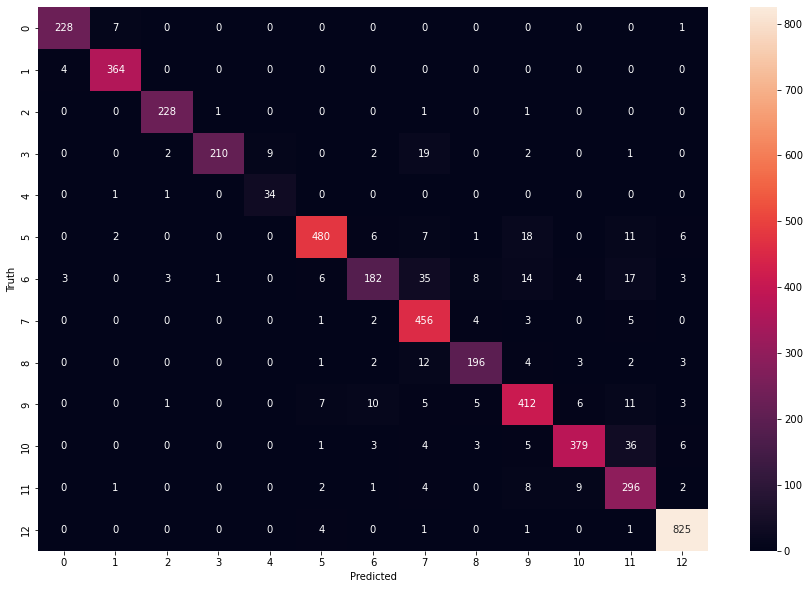

In [65]:
import seaborn as sn
plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Image Prediction

In [89]:
TestIndex = 7;

In [90]:
InputImage = X_test[TestIndex]

In [91]:
y_test[TestIndex]

7

Text(0.5, 1.0, 'Actual Image: Tomato_Late_blight')

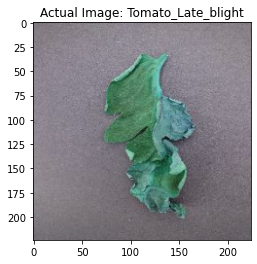

In [98]:
plt.imshow(X_test[TestIndex])
plt.title("Actual Image: "+ classes[TestIndex])

In [101]:
prediction = model.predict(X_test[TestIndex])

ValueError: in user code:

    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)
